# Pipeline for the anomaly detection on the SkAB using Isolation Forest

In [1]:
# libraries importing
import pandas as pd
from sklearn.ensemble import IsolationForest
import shap
import matplotlib.pyplot as plt
%matplotlib inline
from evaluating import evaluating_change_point

## Data loading

In [2]:
# benchmark files checking
all_files=[]
import os
for root, dirs, files in os.walk("data/"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [3]:
# data loading
list_of_df = [pd.read_csv(file, sep=';', index_col='datetime', parse_dates=True) for file in all_files]

## Data description and visualization

In [4]:
# dataset characteristics printing
print(f'A number of datasets in the SkAB v1.0: {len(all_files)}\n')
print(f'Shape of the random dataset: {list_of_df[0].shape}\n')
n_cp = sum([len(df[df.changepoint==1.]) for df in list_of_df])
n_outlier = sum([len(df[df.anomaly==1.]) for df in list_of_df])
print(f'A number of changepoints in the SkAB v1.0: {n_cp}\n')
print(f'A number of outliers in the SkAB v1.0: {n_outlier}\n')
print(f'Head of the random dataset:')
display(list_of_df[0].head())

A number of datasets in the SkAB v1.0: 35

Shape of the random dataset: (1155, 10)

A number of changepoints in the SkAB v1.0: 130

A number of outliers in the SkAB v1.0: 12938

Head of the random dataset:


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 12:14:36,0.027533,0.040251,1.225920,0.054711,70.6086,25.0660,230.831,32.0000,0.0,0.0
2020-03-09 12:14:37,0.027638,0.040555,1.212700,0.054711,70.6873,25.0797,232.721,32.0109,0.0,0.0
2020-03-09 12:14:38,0.027355,0.039930,1.353730,0.710565,70.7463,25.0850,251.194,32.9894,0.0,0.0
2020-03-09 12:14:39,0.028318,0.042112,0.813039,-0.273216,70.5657,25.0730,235.222,32.0000,0.0,0.0
2020-03-09 12:14:40,0.027336,0.040441,1.237940,0.054711,70.5550,25.0799,228.685,32.0109,0.0,0.0


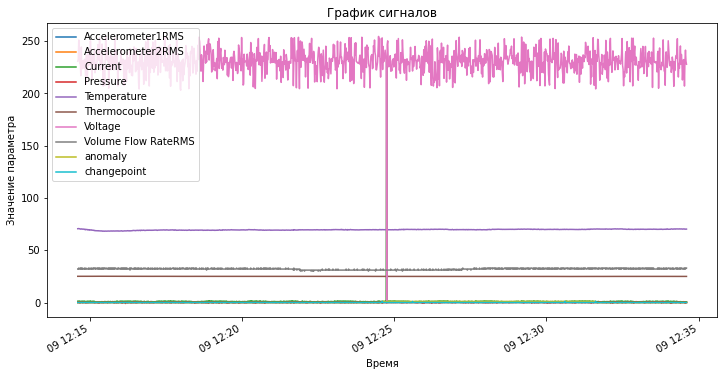

In [5]:
# random dataset visualizing
list_of_df[0].plot(figsize=(12,6))
plt.xlabel('Время')
plt.ylabel('Значение параметра')
plt.title(f'График сигналов')
plt.show()

## Labels

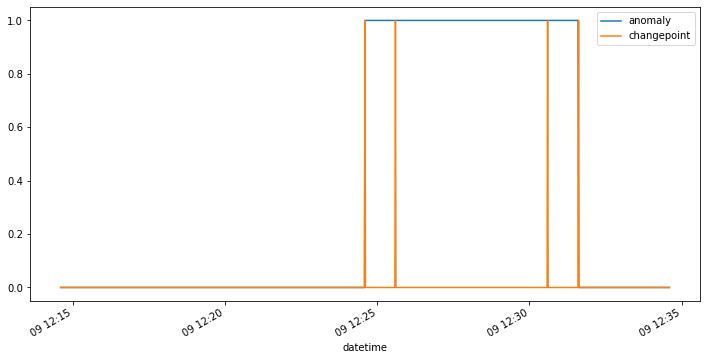

In [6]:
# plotting the labels both for outlier and changepoint detection problems
list_of_df[0].anomaly.plot(figsize=(12,6))
list_of_df[0].changepoint.plot()
plt.legend()
plt.show()

## Method applying

In [40]:
# classifier initializing
clf = IsolationForest(random_state=0, 
                      n_jobs=-1,
                      contamination=0.01)

In [41]:
# train set selection
X_train = list_of_df[0][:'2020-03-09 12:21'].drop(['anomaly','changepoint'], axis=1)
#TODO
#TODO
#TODO
#TODO
#TODO
#TODO
#TODO
#TODO
#TODO

In [42]:
# classifier fitting
clf.fit(X_train)

IsolationForest(contamination=0.01, n_jobs=-1, random_state=0)

In [44]:
# inference
prediction = []
for df in list_of_df:
    prediction.append(pd.Series(clf.predict(df.drop(['anomaly','changepoint'], axis=1))*-1, 
                                index=df.index).rolling(3).median().fillna(0).replace(-1,0))

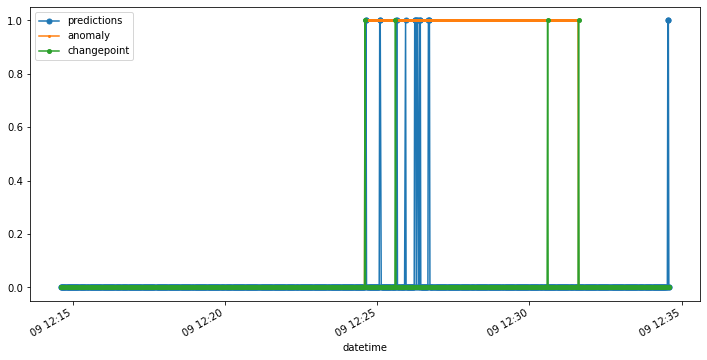

In [45]:
# true outlier indices selection
true_outlier = [df.anomaly for df in list_of_df]

# true changepoint indices selection
true_cp = [df.changepoint for df in list_of_df]

prediction[0].plot(figsize=(12,6), label='predictions', marker='o', markersize=5)
true_outlier[0].plot(marker='o', markersize=2)
true_cp[0].plot(marker='o', markersize=4)
plt.legend();

## Metrics calculation

In [46]:
# binary classification metrics calculation
binary = evaluating_change_point(true_outlier, prediction, metric='binary', numenta_time='30 sec')

False Alarm Rate 60.1 %
Missing Alarm Rate 34.5 %


evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead


In [47]:
# average detection delay metric calculation
# Missing values means a number of not detected changepoints
add = evaluating_change_point(true_cp, prediction, metric='average_delay', numenta_time='30 sec')

Average delay 0 days 00:00:00.621359
Missing values: 27


In [48]:
# nab metric calculation
nab = evaluating_change_point(true_cp, prediction, metric='nab', numenta_time='30 sec')

большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
Standart  -  -538.56
LowFP  -  -1156.76
LowFN  -  -332.37


## [Additional] localization

Shap repository with explonations [link](https://github.com/slundberg/shap)

In [72]:
# load JS visualization code to notebook
shap.initjs()

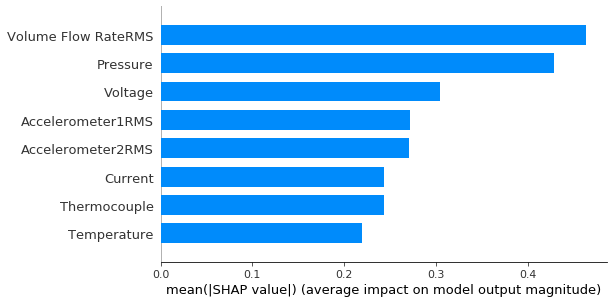

In [81]:
# Create shap values and plot them
X_explain = data[:'2019-07-08 18:30']#[pd.Series(prediction, index=data.index)==-1]

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_explain)

shap.summary_plot(shap_values, X_explain, plot_type='bar')

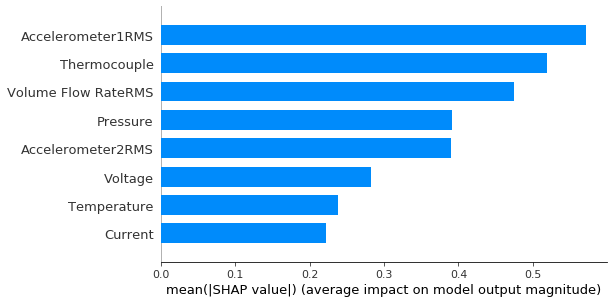

In [82]:
# Create shap values and plot them
X_explain = data['2019-07-08 18:30':'2019-07-08 18:50']#[pd.Series(prediction, index=data.index)==-1]

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_explain)

shap.summary_plot(shap_values, X_explain, plot_type='bar')

In [79]:
# shap.force_plot(explainer.expected_value, shap_values, X_explain)